# Исследование исторических данных о продажах игр

*Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.*

<br> **Цель исследования:**
<br> В данной работе необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<br> **Необходимо проверить гипотезы:**
 * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<br> **Ход исследования**

<br> *Шаг 1. Открыть файл с данными и изучите общую информацию. Путь к файлу: /datasets/games.csv.
<br> Шаг 2. Подготовить данные
<br> Шаг 3. Проведите исследовательский анализ данных
<br> Шаг 4. Составьте портрет пользователя каждого региона
<br> Шаг 5. Проверьте гипотезы
<br> Шаг 6. Напишите общий вывод*

**Согласно документации к данным:**
 * Name — название игры
 * Platform — платформа
 * Year_of_Release — год выпуска
 * Genre — жанр игры
 * NA_sales — продажи в Северной Америке (миллионы проданных копий)
 * EU_sales — продажи в Европе (миллионы проданных копий)
 * JP_sales — продажи в Японии (миллионы проданных копий)
 * Other_sales — продажи в других странах (миллионы проданных копий)
 * Critic_Score — оценка критиков (максимум 100)
 * User_Score — оценка пользователей (максимум 10)
 * Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
<br> *Данные за 2016 год могут быть неполными.*

## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd # Импортируем необходимые методы и библиотеки
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats as st 
import numpy as np

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготавливаем данные

### Меняем названия столбцов

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}) # переименование столбцов
data.columns = data.columns.str.lower() # приводим названия стлбцов к нижнему регистру

### Преобразуем данные в нужные типы

In [7]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [8]:
data.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

Согласно информации о столбце 'user_score' в нем присутствуют значния с аббревиатурой 'tbd', что дословно означает "Подлежит оцениванию", т.е. у данных игр нет оценки и мы можем спокойно заменять эти значения на NaN.

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 
data['user_score'] = data['user_score'].astype(float) # Меняем тип данных для более удобной работы с данными.

### Обрабатываем пропуски

In [10]:
print(data.isna().sum().sort_values())
data.shape

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
rating             6766
critic_score       8578
user_score         9125
dtype: int64


(16715, 11)

<br> Удаляем пропуски в столбце 'year_of_release', ведь их незначительное количество, а выявлять год выхода для каждой игры самостоятельно займет слишком много времени. Также для более удобной работы меняем тип данных в столбце 'year_of_release', который содержит только года выхода игр.
<br> Когда мы удаляем пропуск в столбце 'name', также пропадает пропуск в 'genre', это означает, что у нас всего 2 поврежденные строки, которые мы удаляем.
<br> Возможно пропуски в данных столбцах образовались из-за повреждения данных или некорректного копирования вручную.
<br> По поводу пропусков в столбцах с оценками критиков и пользователей можно сказать, что в разных регионах разные системы и время оценки игр и возможно не все полные данные по регионам были получены. Также у нас представлены данные по рейтингу, который формирует только Американское рейтинговое агентство.

In [11]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['year_of_release'])
data.reset_index(drop= True , inplace= True )
print(data.isna().sum().sort_values())
data['year_of_release'] = data['year_of_release'].astype(int)
data.shape

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating             6676
critic_score       8461
user_score         8981
dtype: int64


(16444, 11)

In [12]:
#columns_to_replace = ['user_score', 'rating', 'critic_score'] # перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['rating']
for column in columns_to_replace:
    data[column] = data[column].fillna('unknown')
print(data.isna().sum().sort_values())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
critic_score       8461
user_score         8981
dtype: int64


In [13]:
data['user_score'] = data['user_score'].replace('tbd', 'unknown') # Заменяем ее на 'unknown'

In [14]:
data.duplicated(subset=['name','platform']).sum()

3

В поисках неявных дубликатов мы обнаружили 3 игры, которые выходили на нескольких консолях и вошли в нашу выборку, т.к. количество незначительное, то обрабатывать их не будем.

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [15]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16439     0.01
16440     0.01
16441     0.01
16442     0.01
16443     0.01
Name: total_sales, Length: 16444, dtype: float64

## Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

<AxesSubplot:xlabel='year_of_release'>

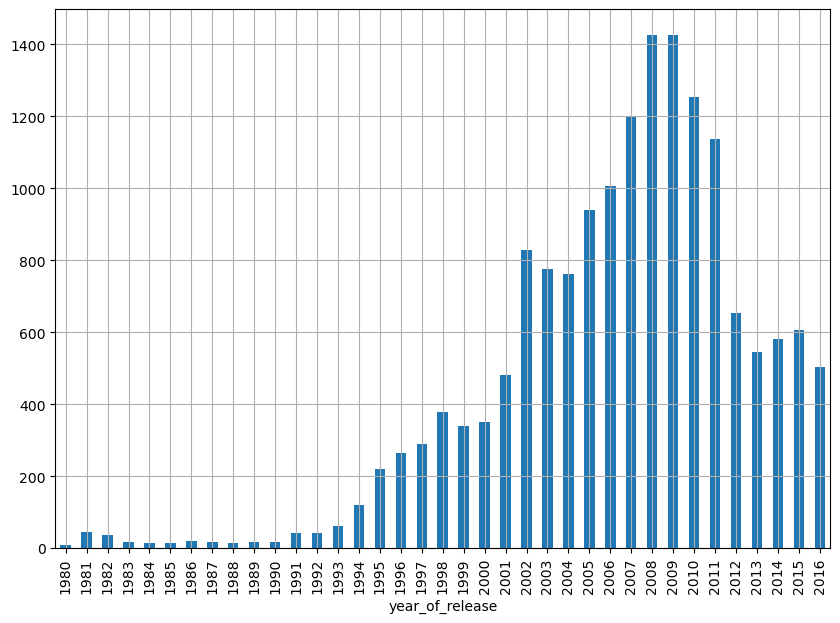

In [16]:
data.groupby('year_of_release')['name'].count()\
    .plot(kind='bar', figsize=(10,7), grid=True) # Посчитаем количества игр, вышедших по годам и построим гистаграмму.

### Посмотрим, как менялись продажи по платформам

<AxesSubplot:xlabel='platform'>

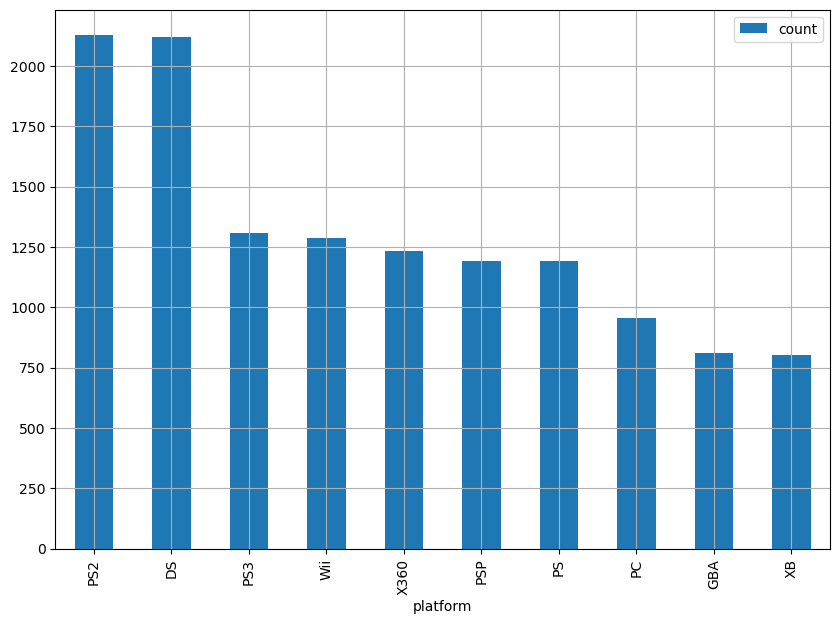

In [17]:
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc=['count'])
platform_sales.columns = ['count']
top10_platform = platform_sales.sort_values(by='count', ascending=False).head(10)
top10_platform.plot(kind='bar', figsize=(10,7), grid=True)

Можно сделать вывод, что пик количества выпускаемых и продаваемых игр был на консолях PS2 и DS, но сейчас игры стали более сложные и дороиге в производстве, растет их качество, но уменьшается общее количество.

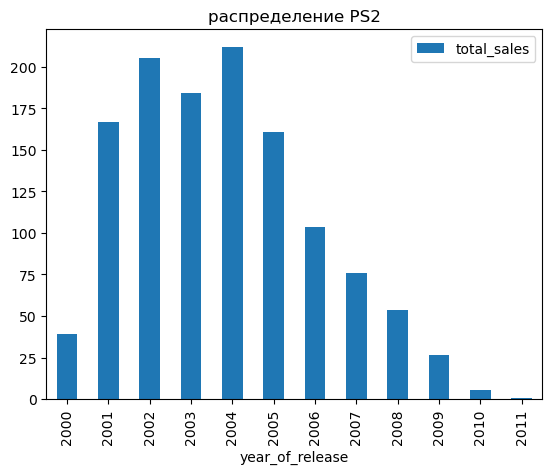

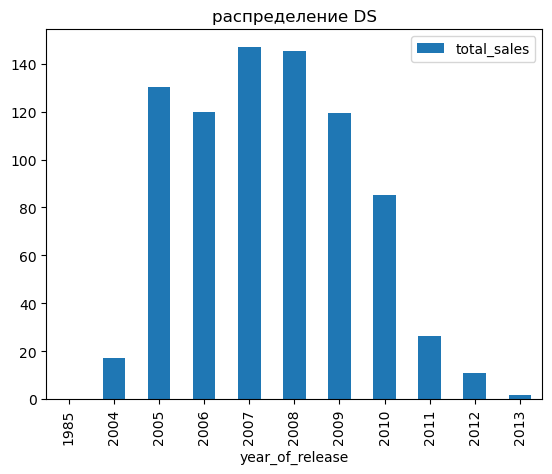

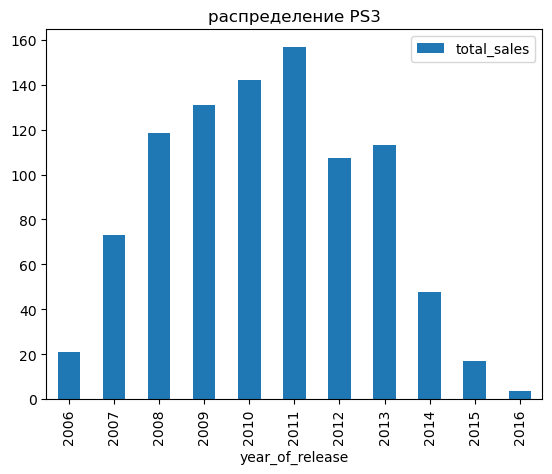

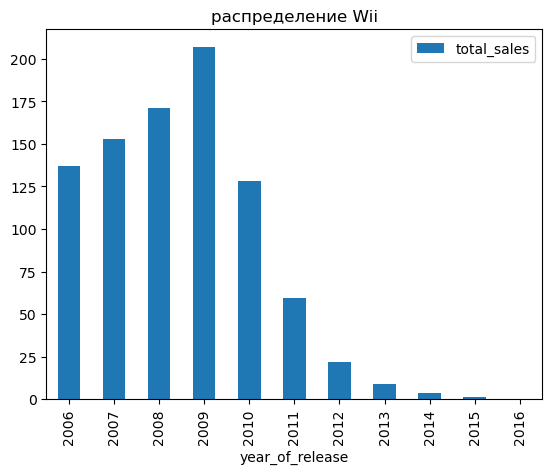

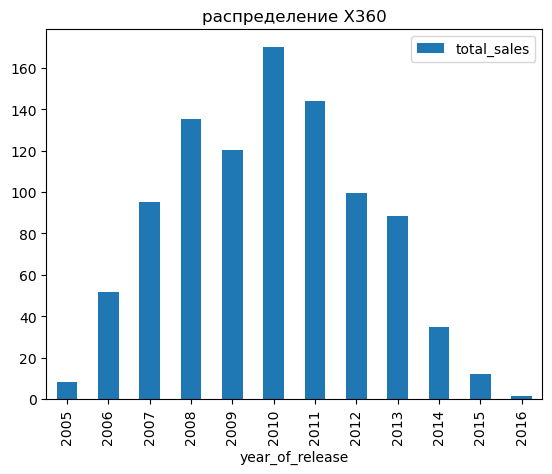

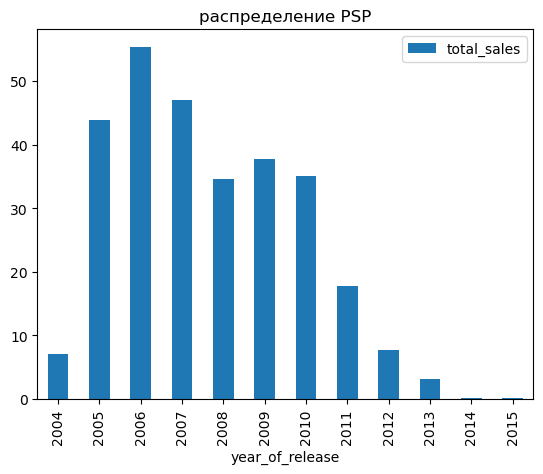

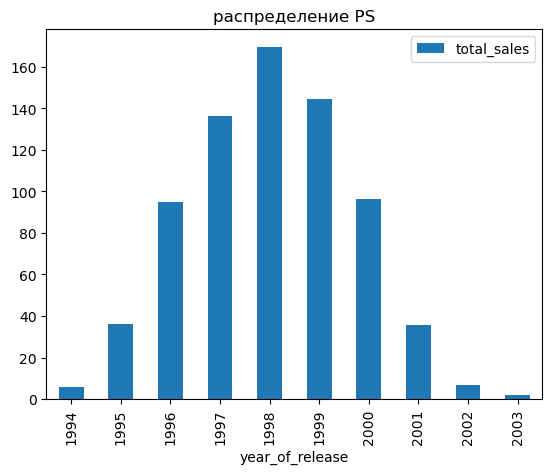

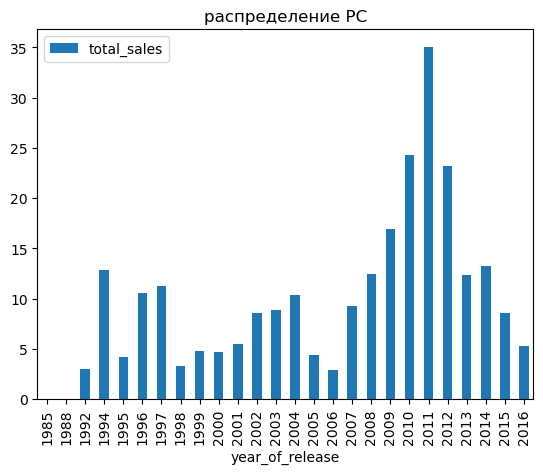

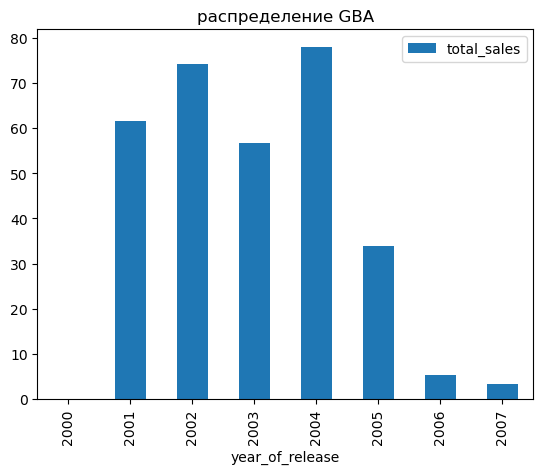

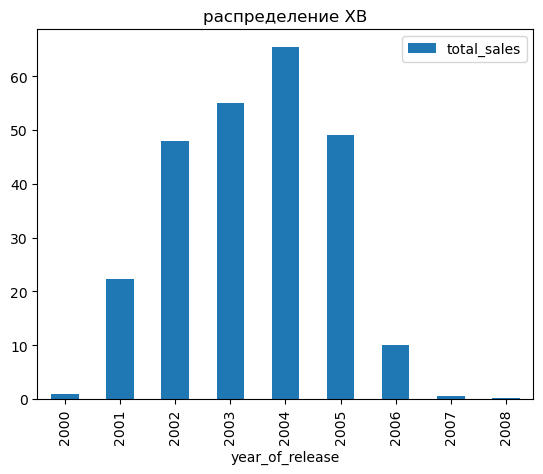

In [18]:
for platform in top10_platform.index:
    data_plot = data[data['platform'] == platform].groupby('year_of_release')\
        .agg({'total_sales': 'sum'})
    data_plot.plot(kind='bar')
    plt.xticks(ticks=range(len(data_plot)), labels=data_plot.index.astype(int))
    plt.title(f'распределение {platform}')
    plt.show()

### Берем данные за актуальный период

Возьмем данные за соответствующий актуальный период для нашего исследования, который мы берем с 2013 года, т.к. именно тогда вышли последние платформы. Именно эти данные помогут построить прогноз на 2017 год.

<AxesSubplot:xlabel='year_of_release'>

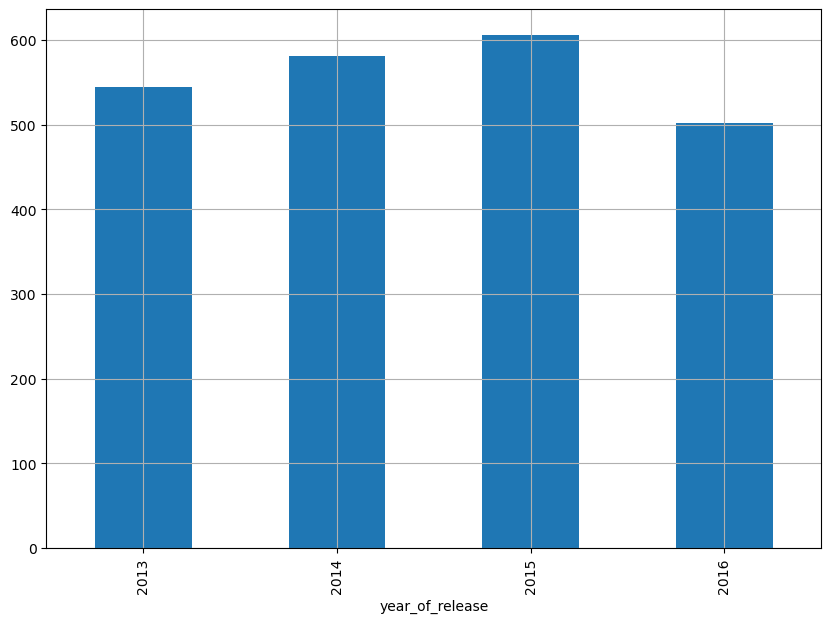

In [19]:
data_new = data[data['year_of_release'] >= 2013]
data_new.groupby('year_of_release')['name'].count()\
    .plot(kind='bar', figsize=(10,7), grid=True)

На графике видно, что в данном срезе по годам общее количество вышедших игр увеличивалось каждый год.

Повторно строим графики для актуальных платформ по нашему обработанному датафрейму и анализируем количество выпускаемых на них игр.

<AxesSubplot:xlabel='platform'>

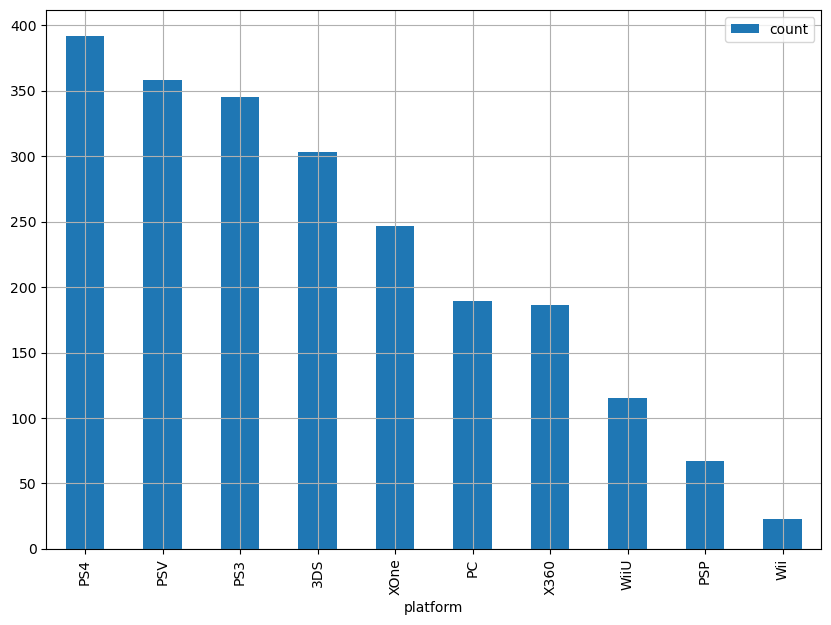

In [20]:
platform_sales = data_new.pivot_table(index='platform', values='total_sales', aggfunc=['count'])
platform_sales.columns = ['count']
top10_platform = platform_sales.sort_values(by='count', ascending=False).head(10)
top10_platform.plot(kind='bar', figsize=(10,7), grid=True)

Исходя из графика можно сделать вывод, что самом популярной платформой является PS4.

### Выберем несколько потенциально прибыльных платформ

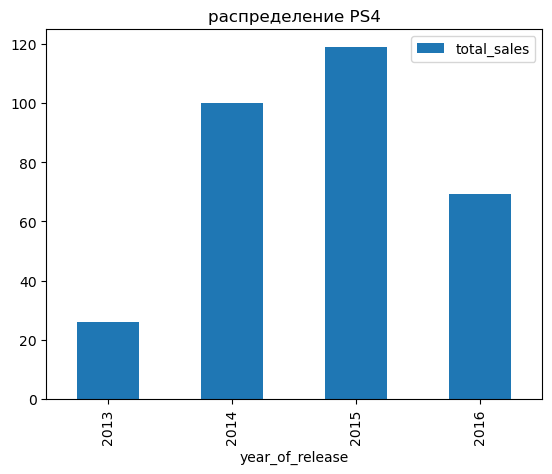

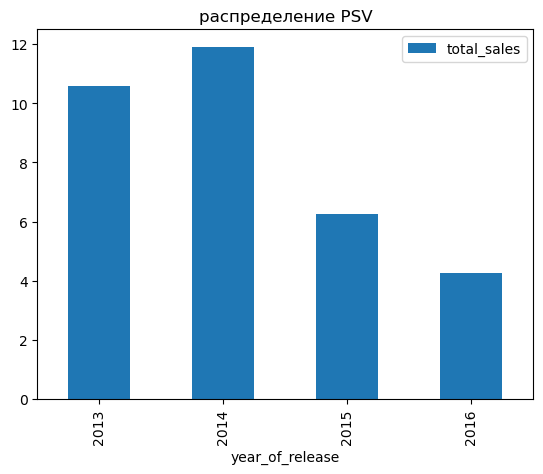

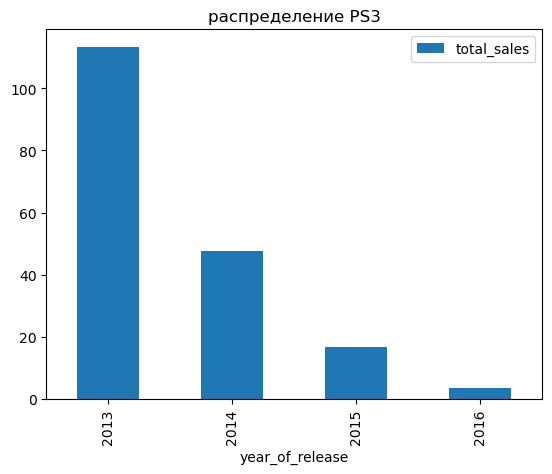

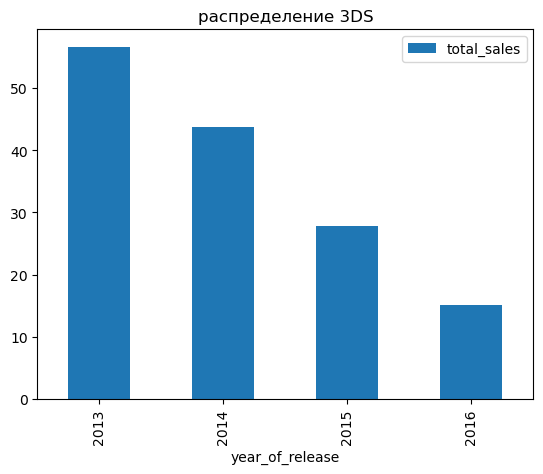

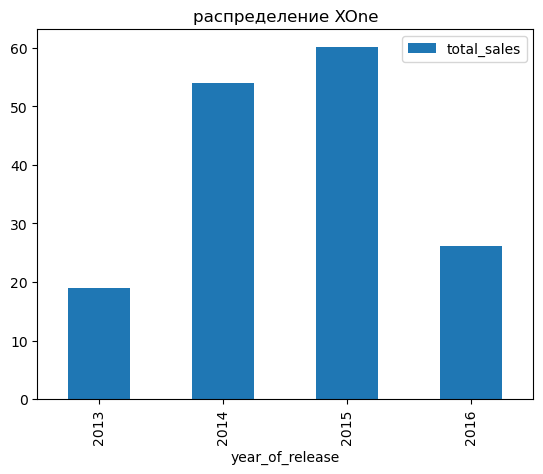

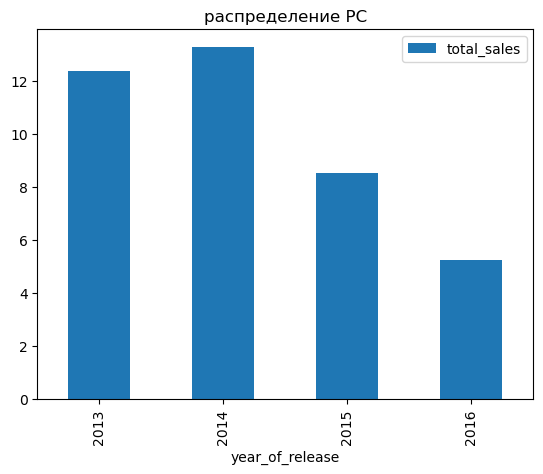

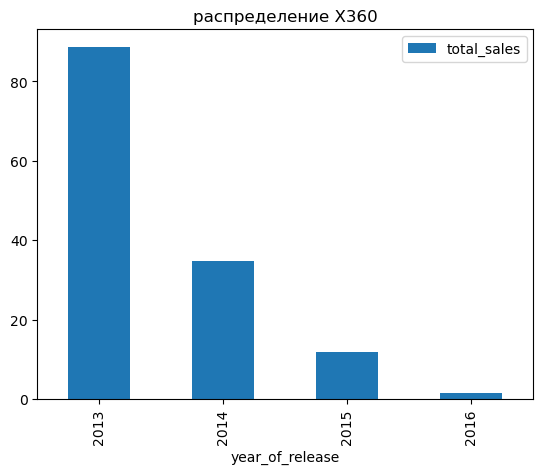

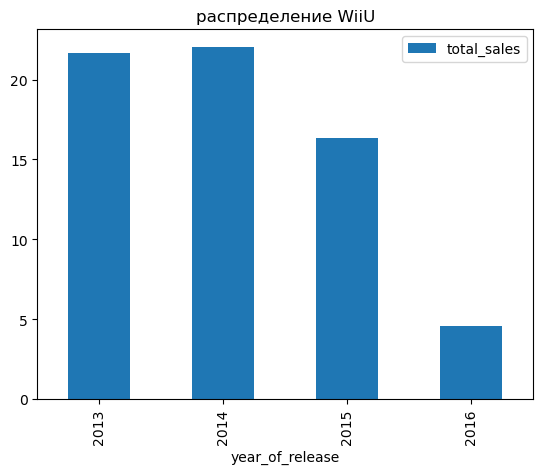

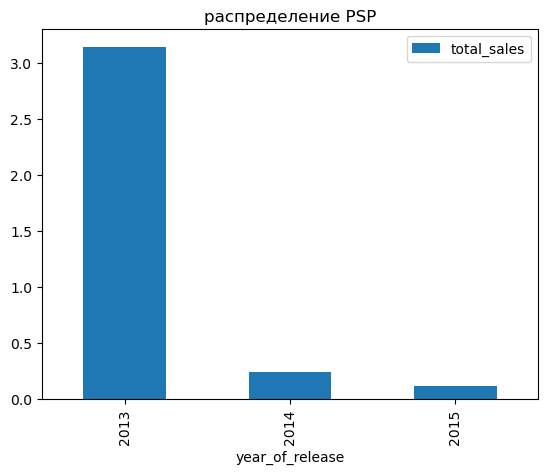

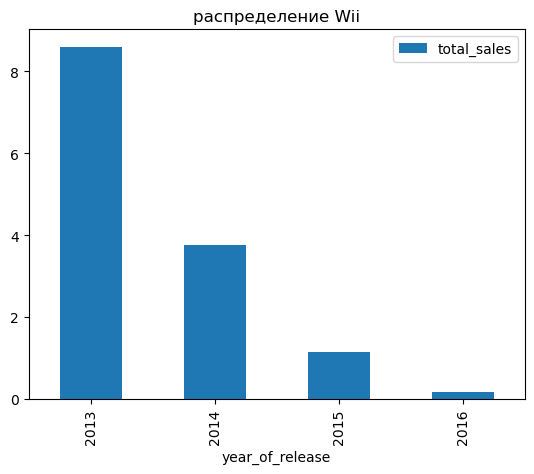

In [21]:
for platform in top10_platform.index:
    data_plot = data_new[data_new['platform'] == platform].groupby('year_of_release')\
        .agg({'total_sales': 'sum'})
    data_plot.plot(kind='bar')
    plt.xticks(ticks=range(len(data_plot)), labels=data_plot.index.astype(int))
    plt.title(f'распределение {platform}')
    plt.show()

<br> Общее количество выпускаемых игр на старых платформах уменьшается, поэтому стоит выделить потенциально прибыльные новые платформы, на которых выпускается больше всего игр, а при общем падении количества выпущенных игр данными платформами продолжают быть актуальными. Ими являются: PS4, PSV, 3DS, XOne, PC.
<br> Данные за 2016 год неполные, поэтмоу делать точный вывод, что количество выпущенных игр уменьшилось некорректно.

### Построим график «ящик с усами» по глобальным продажам игр

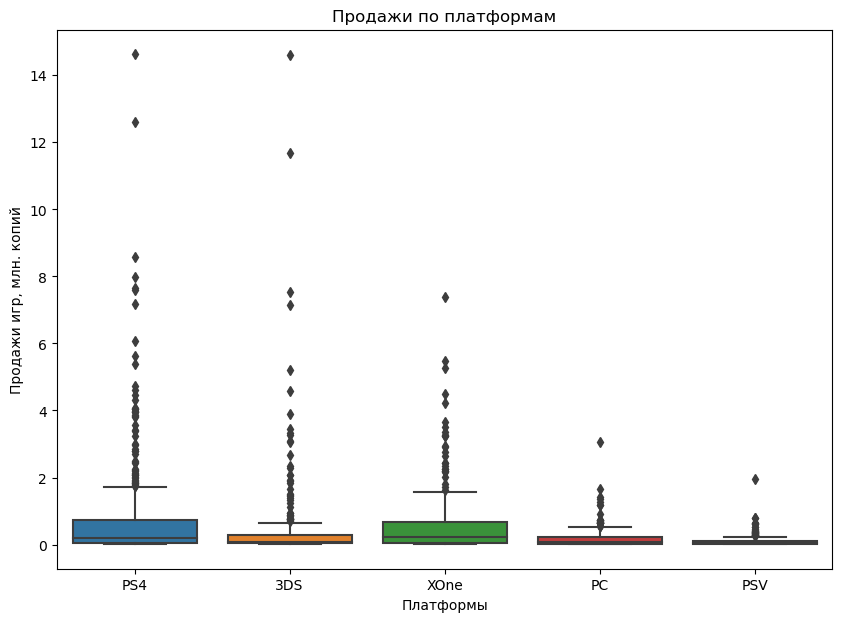

In [22]:
platforms = ['PS4', 'PSV', '3DS', 'XOne', 'PC']
data_new = data_new.query("platform.isin(@platforms)")
# data_new.boxplot(column='total_sales', by='platform', grid=True, figsize=(10,7), showfliers=False)
plt.figure(figsize=(10, 7)) # Построим диаграмму размаха продаж по платформам с выбросами по продажам некоторых игр
# plt.ylim([0,3])
box = sb.boxplot(
    data=data_new,
    x='platform',
    y='total_sales'
    ).set(title='Продажи по платформам', xlabel='Платформы', ylabel='Продажи игр, млн. копий')
plt.show()

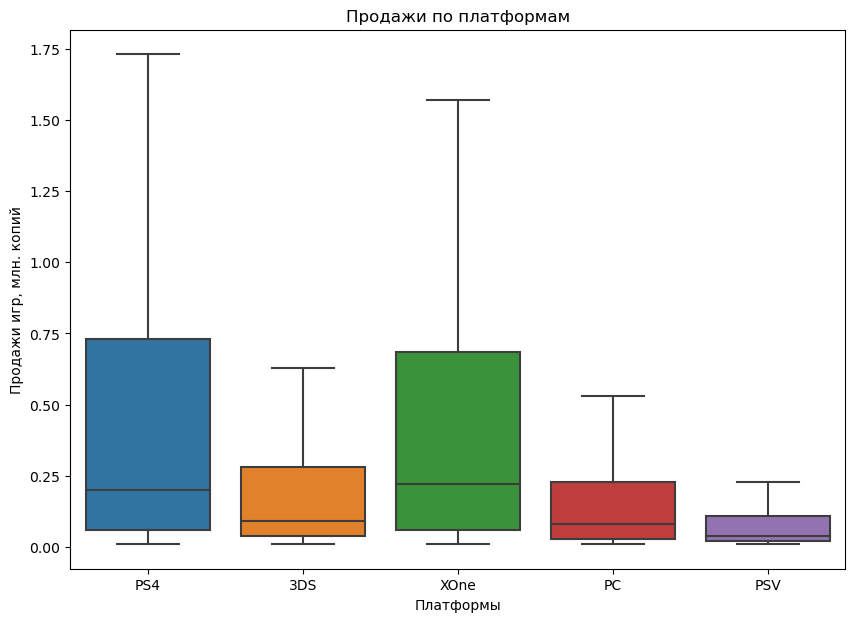

In [23]:
plt.figure(figsize=(10, 7)) # Построим диаграмму размаха продаж по платформам без выбросов по продажам
box = sb.boxplot(
    data=data_new,
    x='platform',
    y='total_sales',
    showfliers=False
    ).set(title='Продажи по платформам', xlabel='Платформы', ylabel='Продажи игр, млн. копий')
plt.show()

In [24]:
data_new['total_sales'].describe()

count    1489.000000
mean        0.462814
std         1.159209
min         0.010000
25%         0.030000
50%         0.100000
75%         0.340000
max        14.630000
Name: total_sales, dtype: float64

Большинство продаж приходится на новые платформы: первое место занимает PS4, а второе с небольшим отставанием XOne, игроки из Японии, которые больше предпочитают портативные приставки позволяют платформе 3DS занять третье место. Далее распологаются продажи на PC, меньше всего продаж приходится на уже теряющую актуальность PSV.
По диаграммам размаха также можно сделать вывод, что большинство игр (более 75%) продается слабо (половина игр была продана тиражом 0.1 млн, при среднем 0.5 млн), бóльшая часть продаж приходится на небольшое количество топовых игр.

### Посмотрим, что влияет на продажи внутри одной популярной платформы

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Также сравним результаты PS4 с результатами на других платформах.

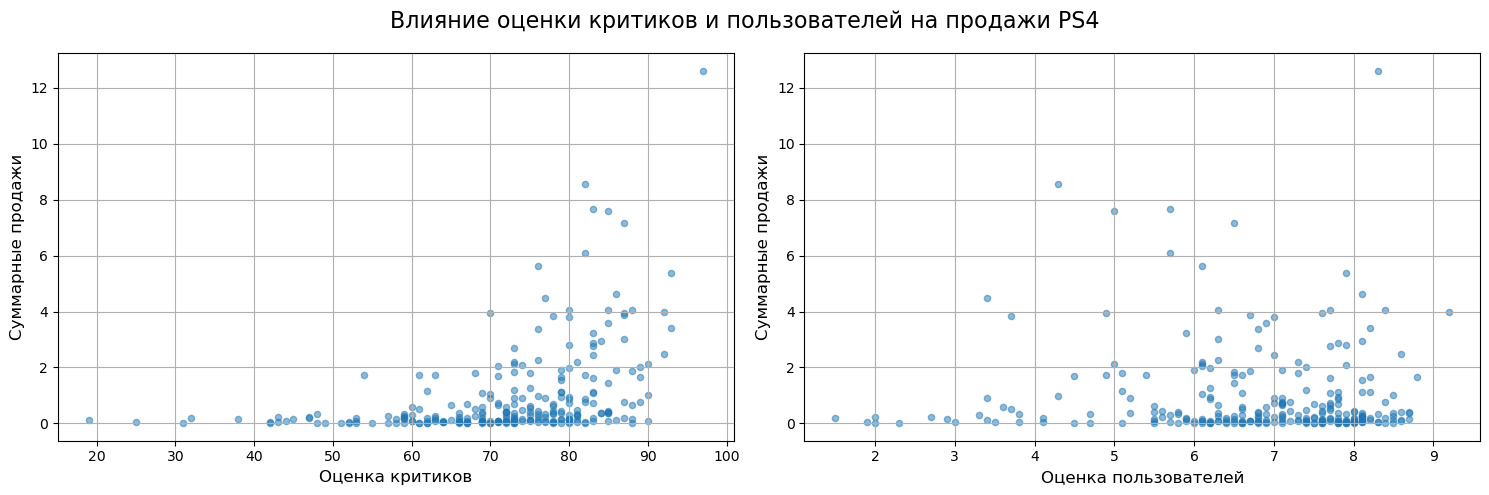

Коэффициент Пирсона, показывающий взаимосвязь изменения объема продаж игр от оценки пользователей для PS4, составляет -0.031957110204556424.

Коэффициент Пирсона, показывающий взаимосвязь изменения объема продаж игр от оценки критиков  для PS4, составляет 0.40656790206178095.
---------------------------
 


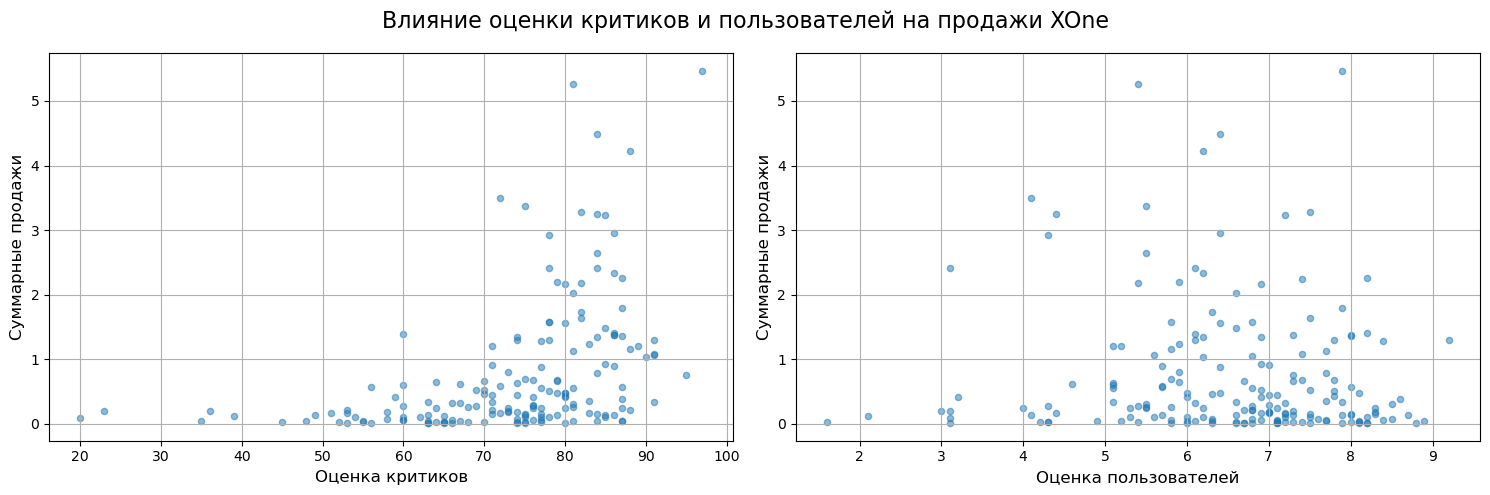

Коэффициент Пирсона, показывающий взаимосвязь изменения объема продаж игр от оценки пользователей для XOne, составляет -0.06892505328279414.

Коэффициент Пирсона, показывающий взаимосвязь изменения объема продаж игр от оценки критиков  для XOne, составляет 0.4169983280084017.
---------------------------
 


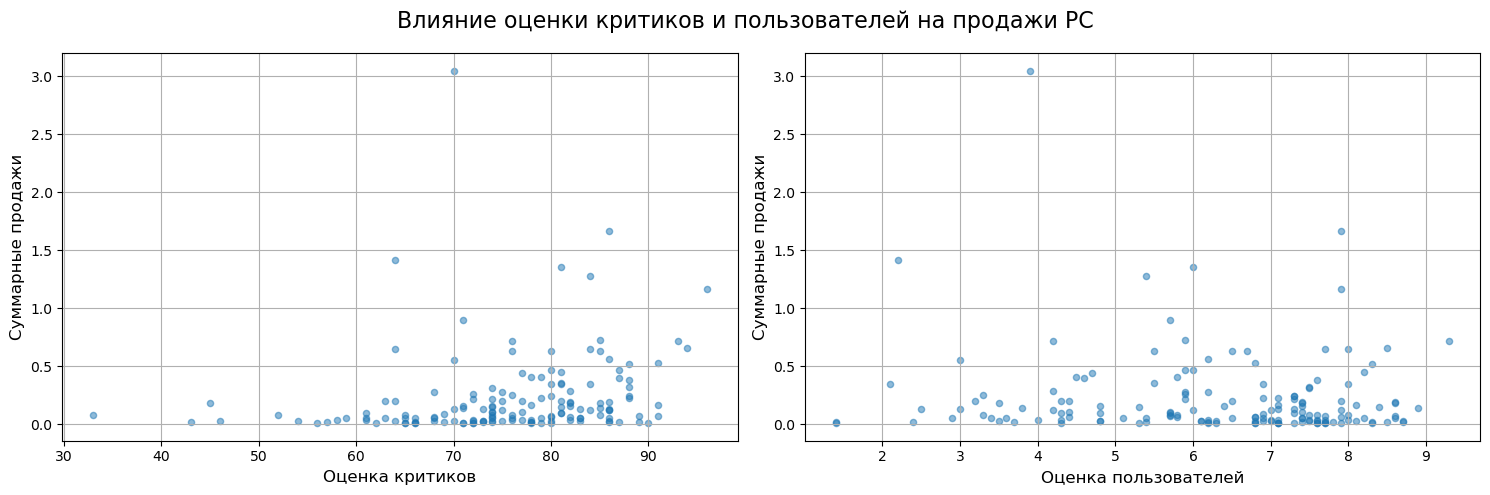

Коэффициент Пирсона, показывающий взаимосвязь изменения объема продаж игр от оценки пользователей для PC, составляет -0.0938418695247674.

Коэффициент Пирсона, показывающий взаимосвязь изменения объема продаж игр от оценки критиков  для PC, составляет 0.19603028294369382.
---------------------------
 


In [25]:
# создадим собственную функцию для построения диаграмм рассеяния любой платформы
def scattering_diagram (platform):
    diagram_name = data_new.query('platform == @platform')

    figure, ax = plt.subplots(1, 2, figsize=(15, 5))
    plt.suptitle(f'Влияние оценки критиков и пользователей на продажи {platform}', fontsize=16)

    (
        diagram_name.plot(ax=ax[0], x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.5)
    )
    ax[0].set_xlabel('Оценка критиков', fontsize=12)
    ax[0].set_ylabel('Суммарные продажи', fontsize=12)

    (
        diagram_name.plot(ax=ax[1], x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.5)
    )
    ax[1].set_xlabel('Оценка пользователей', fontsize=12)
    ax[1].set_ylabel('Суммарные продажи', fontsize=12)

    plt.tight_layout()
    plt.show()

    # считаем корреляцию для пользователей и критиков
    user_correlation = diagram_name['user_score'].corr(diagram_name['total_sales'])
    print(f'Коэффициент Пирсона, показывающий взаимосвязь изменения объема продаж игр от оценки пользователей для {platform}, составляет {user_correlation}.\n')

    critic_correlation = diagram_name['critic_score'].corr(diagram_name['total_sales'])
    print(f'Коэффициент Пирсона, показывающий взаимосвязь изменения объема продаж игр от оценки критиков  для {platform}, составляет {critic_correlation}.\n---------------------------\n ')

for platform in ['PS4', 'XOne', 'PC']:
    scattering_diagram(platform)

По диаграмме рассеяния и слабой обратной корреляции можно сделать вывод, что оценки пользователей корреляции с продажами не имеют. По диаграмме рассеяния и слабой прямой корреляции можно сделать вывод, что оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. На других платформах мы видим аналогичную картину.

### Посмотрим на общее распределение игр по жанрам

<AxesSubplot:xlabel='genre'>

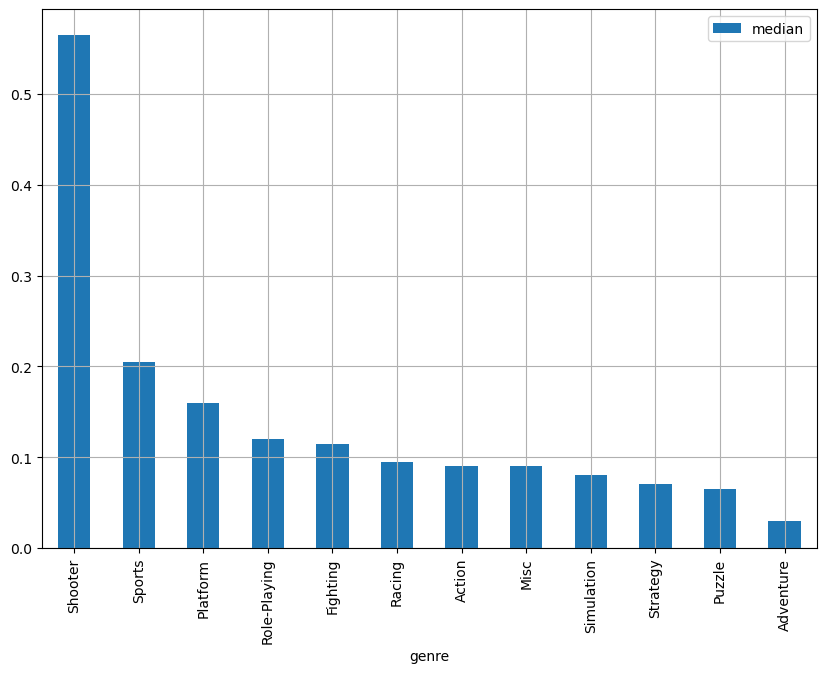

In [26]:
genre_sales = data_new.pivot_table(index='genre', values='total_sales', aggfunc=['median'])
genre_sales.columns = ['median']
genre_top = genre_sales.sort_values(by='median', ascending=False)
genre_top.plot(kind='bar', figsize=(10,7), grid=True)

Взяв медианное значение количества продаж игр, мы выяснили, что самым популярным жанром являются шутеры, заними идут спортивные игры, а самым непопулярным жанром являются адвенчруы.

<AxesSubplot:ylabel='total_sales'>

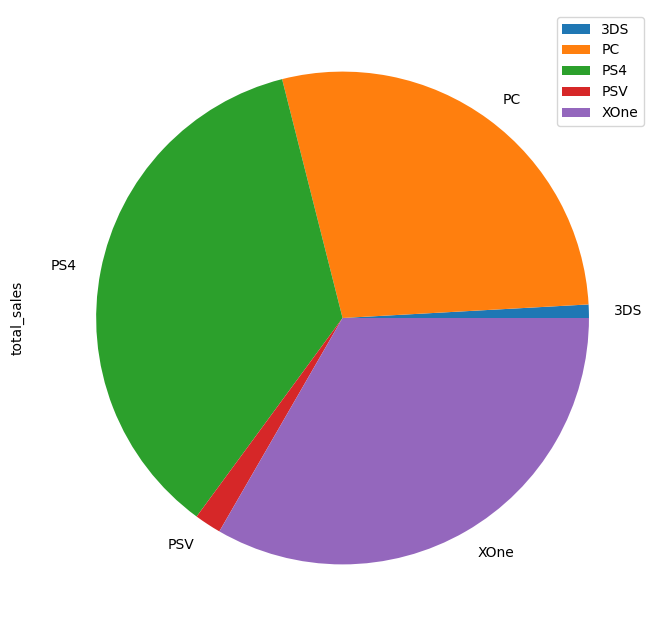

In [27]:
shooter = data_new.loc[data_new['genre'] == 'Shooter'] # Построим круговую диаграмму для самого популярного жанра
shooter = shooter.pivot_table(index='platform', values='total_sales', aggfunc=['count', 'mean'])
shooter.plot(y='count', kind='pie', figsize=(8, 8))

Больше всего игр в жанре Shooter вышло на самой популярной платформе - PS4, за ней идет конкурент в лице XOne, а на 3 месте игры на PC. PSV теряет свою актуальность, что было нами выявлено раннее, стоит делать ставку на новые консоли и ПК.

## Составим портрет пользователя для каждого региона

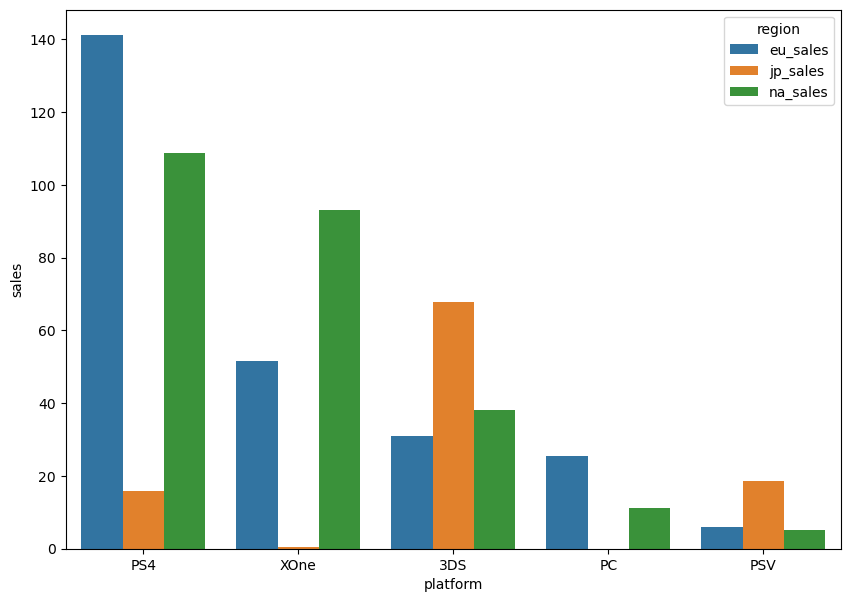

In [28]:
platform_sales = data_new.groupby(by='platform')[['eu_sales', 'jp_sales', 'na_sales']].sum().\
    round(2).sort_values(by='eu_sales', ascending=False)[:5].stack().reset_index()
platform_sales.columns = ['platform', 'region', 'sales']

plt.figure(figsize=(10,7))
sb.barplot(data=platform_sales, x='platform', y='sales', hue='region')
plt.show()

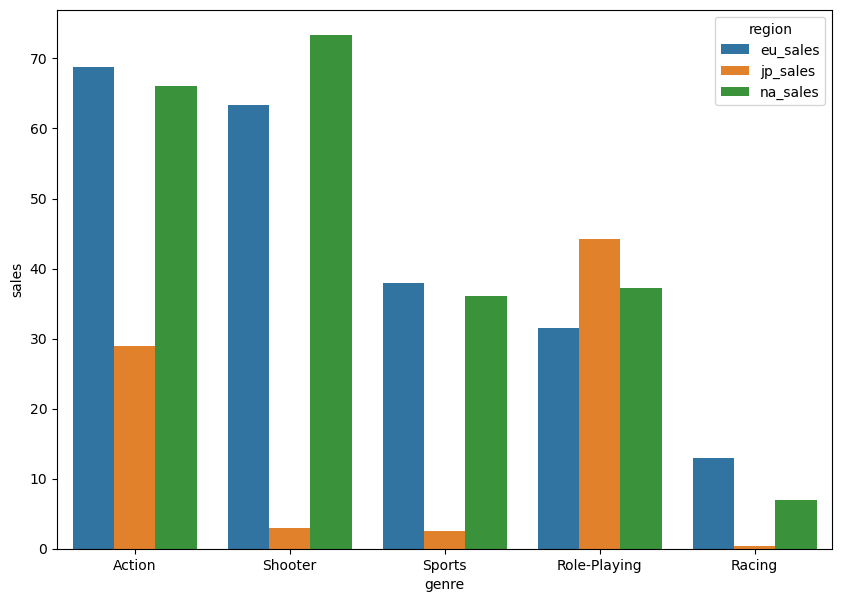

In [29]:
genre_sales = data_new.groupby(by='genre')[['eu_sales', 'jp_sales', 'na_sales']].sum().\
    round(2).sort_values(by='eu_sales', ascending=False)[:5].stack().reset_index()
genre_sales.columns = ['genre', 'region', 'sales']

plt.figure(figsize=(10,7))
sb.barplot(data=genre_sales, x='genre', y='sales', hue='region')
plt.show()

**Определим количество продаж игр в регионах по рейтингу.**
<br> Столбец Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию, а именно:
<br> E («Everyone») — «Для всех»
<br> E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
<br> T («Teen») — «Подросткам»
<br> M («Mature») — «Для взрослых 17+»

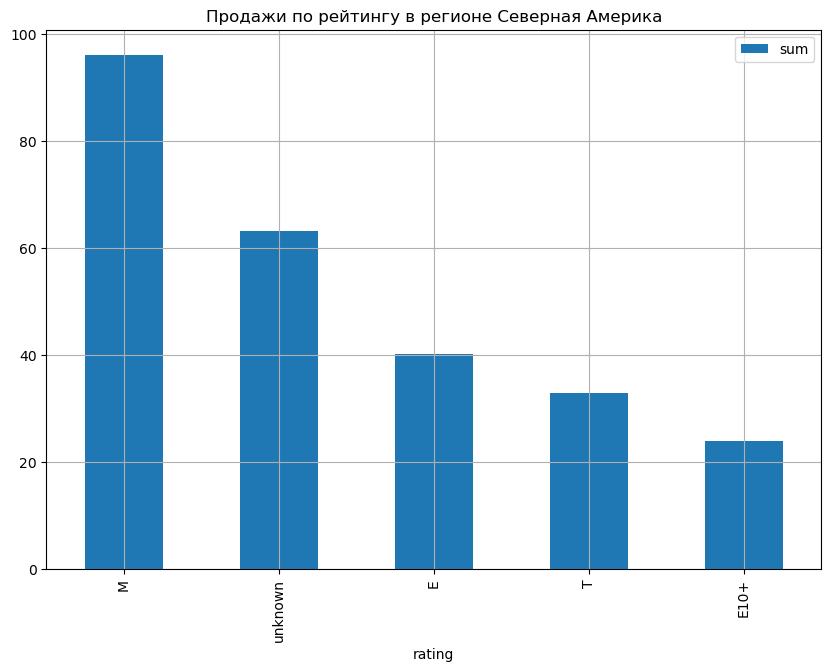

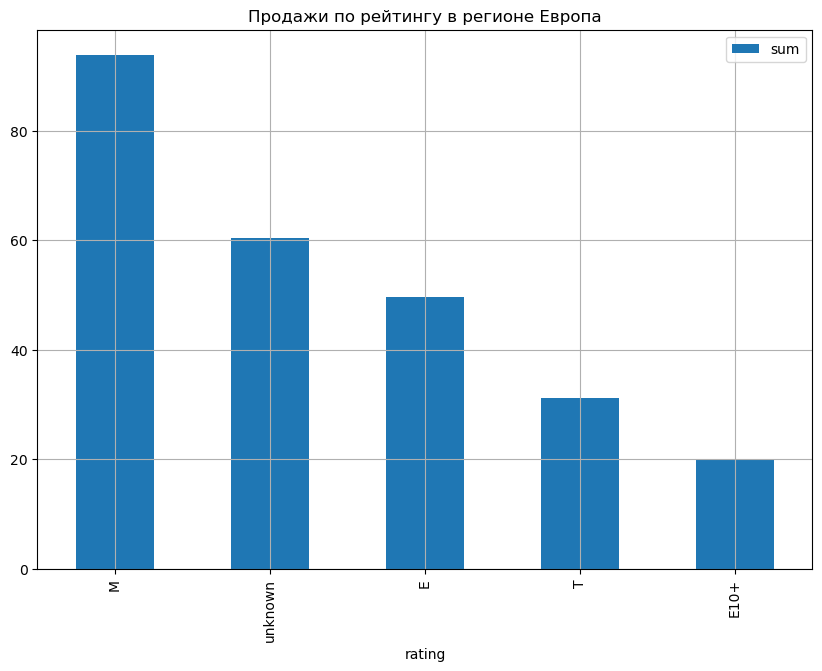

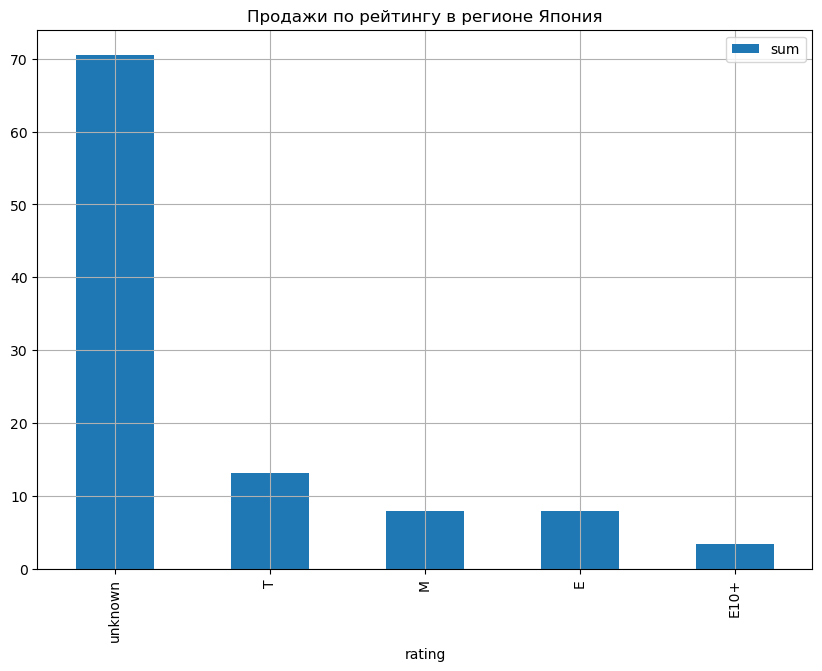

In [30]:
region_sales = {'na_sales':'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония'}
for region in region_sales.keys():
    rating_sales = data_new.pivot_table(index='rating', values=region, aggfunc=['sum'])
    rating_sales.columns = ['sum']
    rating_top = rating_sales.sort_values(by='sum', ascending=False)
    rating_top.plot(kind='bar', figsize=(10,7), grid=True)
    plt.title(f'Продажи по рейтингу в регионе {region_sales[region]}')

### Портет пользователя

**По полученным в ходе исследования данным составим потрет игрока для каждого региона.**

<br> *Пользователи из Европы:* 
* Самая популярная платформа: PS4 (Sony PlayStation 4)
* Самый популярный жанр: Action (Экшен)
* Самый популярный рейтинг: M («Для взрослых 17+»)

<br> *Пользователи из Северной Америки:* 
* Самая популярная платформа: PS4 (Sony PlayStation 4)
* Самый популярный жанр: Shooter (Шутер)
* Самый популярный рейтинг: M («Для взрослых 17+»)

<br> *Пользователи из Японии:* 
* Самая популярная платформа: 3DS (Nintendo 3DS)
* Самый популярный жанр: Role-Playing (Ролевая игра)
* Самый популярный рейтинг: не определен. Скорее всего из-за того, что рейтинги формирует Америка.

<br>Можно сделать вывод, что данные по пользователям из Европы и Северной Америки практически одинаковые, а с Японией есть явные различия.

## Проверим гипотезы

<br> Проверяем гипотезы:
   <br> *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   <br> Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

<br> Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
```
H_0: Средний пользовательский рейтинг (user_score) пользователей платформы Xbox One = среднему пользовательскому рейтингу (user_score) пользователей платформы PC`
H_a: Средний пользовательский рейтинг (user_score) пользователей платформы Xbox One ≠ среднему пользовательскому рейтингу (user_score) пользователей платформы PC`
alpha = 0.05
```

In [31]:
data_new = data_new.dropna(subset=['user_score'])
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    data_new[data_new['platform'] == 'XOne']['user_score'], 
    data_new[data_new['platform'] =='PC']['user_score'], equal_var=False)
# alpha = задайте значение уровня значимости
alpha = .05
# вывод значения p-value на экран 
print('p-значение:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Вывод: Уровень значимости 15%, а это значит, что мы не может отвергнуть гипотезу H_0, поэтому средние пользовательские рейтинги платформ Xbox One и PC действительно одинаковые.

Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;
```
H_0: Средний пользовательский рейтинг (user_score) жанра Action ≠ среднему пользовательскому рейтингу (user_score) жанра Sports`
H_a: Средний пользовательский рейтинг (user_score) жанра Action = среднему пользовательскому рейтингу (user_score) жанра Sports`
alpha = 0.05
```

In [32]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    data_new[data_new['genre'] == 'Action']['user_score'], 
    data_new[data_new['genre'] !='Action']['user_score'], equal_var=False)
# alpha = задайте значение уровня значимости
alpha = .05
# вывод значения p-value на экран 
print('p-значение:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.054270334554804976
Не получилось отвергнуть нулевую гипотезу


Вывод: Уровень значимости немного больше установленного нами порога в 5%, а это значит, что гипотеза H_0 не может быть отвергнута и средний пользовательский рейтинг (user_score) жанра Action отличается от среднего пользовательского рейтинга (user_score) жанра Sports.

# Общий вывод

В данной работе с помощью нескольких библиотек python удалось выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке игр.

Перед выполнением поставленных задач также была проведена работа по предобработке и подготовке данных.

1. Были проанализированы самые популярные платформы, на которых выпускаются игры. Так как данные платформы вышли недавно, а нам заявлено, что за 2016 год данные могут быть неполными, то на спад количества игр в 2016 году не стоит ориентироваться.
2. Стоит выделить потенциально прибыльные новые платформы, на которых выпускается больше всего игр, а при общем падении количества выпущенных игр данными платформами продолжают быть актуальными. Ими являются: PS4, 3DS, XOne, PC.
3. Можно сделать вывод, что самым популярным жанром являются шутеры, за ними идут спортивные игры, а самым непопулярным жанром являются адвенчруы и пазлы.
4. По полученным в ходе исследования данным был составлен потрет игрока для каждого региона. Можно сделать вывод, что данные по пользователям из Европы и Северной Америки практически одинаковые, а с Японией есть явные различия.

*Пользователи из Европы:* 
* Самая популярная платформа: PS4 (Sony PlayStation 4)
* Самый популярный жанр: Action (Экшен)
* Самый популярный рейтинг: M («Для взрослых 17+»)

*Пользователи из Северной Америки:* 
* Самая популярная платформа: PS4 (Sony PlayStation 4)
* Самый популярный жанр: Shooter (Шутер)
* Самый популярный рейтинг: M («Для взрослых 17+»)

*Пользователи из Японии:* 
* Самая популярная платформа: 3DS (Nintendo 3DS)
* Самый популярный жанр: Role-Playing (Ролевая игра)
* Самый популярный рейтинг: не определен. Скорее всего из-за того, что рейтинги формирует Америка.

6. Проведен статистических анализ данных, в котором рассматривались 2 теории: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
7. Уровень значимости в 15%, не позволяет отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC действительно одинаковые
8. Уровень значимости немного больше установленного нами порога в 5%, а это значит, что гипотеза H_0 не может быть отвергнута и средний пользовательский рейтинг (user_score) жанра Action отличается от среднего пользовательского рейтинга (user_score) жанра Sports.
9. Большинство продаж приходится на новые платформы: первое место занимает PS4, а второе с небольшим отставанием XOne, игроки из Японии, которые больше предпочитают портативные приставки позволяют платформе 3DS занять третье место. Далее распологаются продажи на PC, меньше всего продаж приходится на уже теряющую актуальность PSV. По диаграммам размаха также можно сделать вывод, что большинство игр (более 75%) продается слабо (половина игр была продана тиражом 0.1 млн, при среднем 0.5 млн), бóльшая часть продаж приходится на небольшое количество топовых игр.
10. По диаграмме рассеяния и слабой обратной корреляции можно сделать вывод, что оценки пользователей корреляции с продажами не имеют. По диаграмме рассеяния и слабой прямой корреляции можно сделать вывод, что оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Результаты представлены в таблице ниже, где на других платформах мы видим аналогичную картину. 
    | | PS4  | XOne    | PC   |
|---:|:-------------|:-----------|:------|
| **Коэффициент Пирсона (объем продаж от оценки пользователей)** | -0.03  | -0.07       | -0.09   |
| **Коэффициент Пирсона (объем продаж от оценки критиков)** | 0.4  | 0.4    | 0.2   |


<br> Планируя рекламную кампанию на 2017 год стоит обратить особое внимание на продвижение таких современных платформ как Sony PlayStation 4 и Xbox One, и в особенности игр в жанрах Action, Sports и Shooter.
<br> Также необходимо помнить об особенностях рынка и подстроить рекламу конкретно под него. Например, для Северной Америки и Европы можно разработать одну рекламню кампанию, а для игроков из Японии - другую, т.к. у них лидируют иные игры и плтформы.